## 10. Feladatsor (advekció)

In [1]:
using Plots
using LinearAlgebra

**Differenciálegyenlet**

Tekintsük az
$$
\partial_t u = - a \partial_{x} u
$$

parciális differenciálegyenletet, ahol $a \geq 0$ egy valós szám.

### 1. Feladat

Mutassuk meg, hogy az $u$ megoldás állandó az $x - at = c$ egyenletű egyenesek mentén - ahol $c$ mondja meg, hogy melyik egyenesen vagyunk.

**Megoldás:**

Legyen $u(t, x) = \varphi(x - at)$. Helyettesítsük be ezt a kifejezést az egyenlet mindkét oldalába, majd számoljuk ki, hogy mit kapunk.

### 2. Feladat
Milyen formulával kapható meg az $u$ megoldás az $u(0, x) = u_0(x)$ kezdeti-feltételből?

**Megoldás:**

$$u(t,x) = u_0(x - at) $$

### 3. Feladat

Írjunk programot, ami adott $u_0$ kezdeti-feltétel alapján ábrázolja az $u$ megoldást az idő és a tér függvényében. Ha úgy egyszerűbb, legyen $a=-1, u_0(x) = \sin(\pi x)$.

In [2]:
u0(x) = sin(x*pi)
a = -1

u(t, x) = u0(x - a*t)

u (generic function with 1 method)

a) ábrázoljuk az $u(t, \cdot)$ függvényt néhány $t$-re.

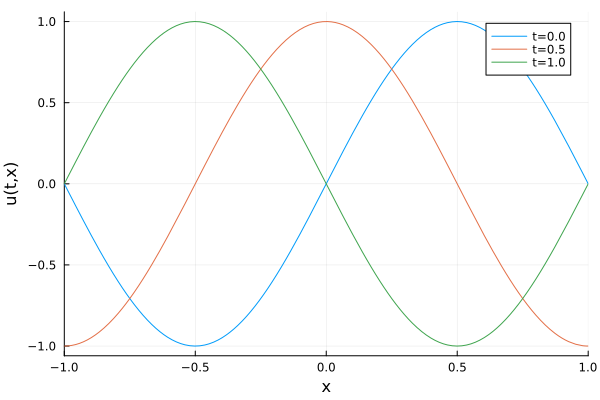

In [3]:
p = plot(xlim=(-1, 1))
xlabel!("x")
ylabel!("u(t,x)")
for t = 0:0.5:1
    plot!(x->u(t, x), label="t=$t")
end
display(p)

b) használjuk a contourf parancsot és ábrázoljuk $u$-t a $[0,1]\times[0,1]$-en.

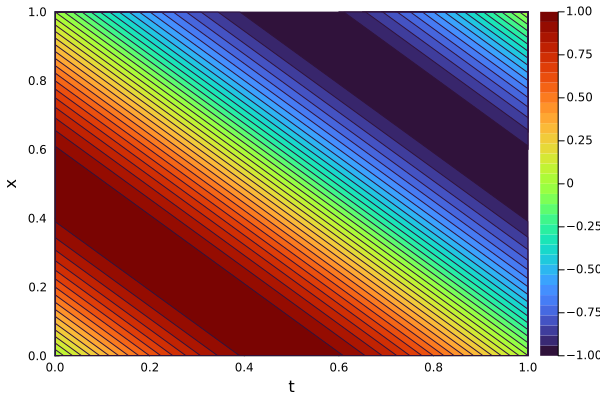

In [4]:

ts = (0:100)./100
xs = ts'
us = @. u(ts', xs')

contourf(ts, xs', us, levels=33, color=:turbo)
xlabel!("t")
ylabel!("x")

### 4. Feladat
A kezdeti feltétel értékei közül melyik(ek)től függ az $u(t, x)$ érték?

**Megoldás:**

Az $u_0(x-at)$ értéktől.

---
**Diszkretizáció**

Első lépésként szemidiszkretizáljunk, azaz vezessük vissza a parciális differenciálegyenletünket egy közönséges differenciálegyenlet-rendszerre.
Ehhez tehát az $x$ változó által indexelt végtelendimenziós teret kell egy végesdimenziósra cserélnünk, valamint ezzel együtt a $\partial_{x}$ operátort egy olyanra, mely ezen a végesdimenziós téren hat.

Pontosítsuk az egyenletünket: az idő legyen pozitív, a teret pedig szűkítsük le a $[0,1]$ intervallumra, valamint vegyünk egy $u_0$ kezdeti feltételt, és egy homogén Dirichlet-peremfeltételt.

$$
\begin{cases}
    \partial_t u &= -a \partial_{x} u,  &(0, \infty) \times (0, 1)\text{-en} \\
    \\
    u(0, x)  &= u_0(x), & 0 \leq x \leq 1 \\
    \\
    u(t, 0) &= 0, &0 < t \\
    u(t, 1) &= 0. &0 < t    
\end{cases}
$$

### 5. Feladat

Legyen $g$ egy kétszer folytonosan diff.ható valós-valós függvény, mely definiált a $0$ egy környezetén. Milyen formulát tudnánk adni a $g'(0)$ érték közelítésére?

**Megoldás:**

Mindenki emlékszik, hogy a
$$
\frac{g(h) - g(0)}{h}, \qquad \frac{ g(0) - g(-h) }{h}, \qquad \frac{ g(h) - g(-h) }{2h}
$$
kifejezések egyike jó lesz. Ha nem, akkor célszerű sorbafejteni a $0$ körül.

### 6. Feladat

Vegyünk a $[0,1]$ intervallum egy egyenletes, $N+2$ pontból álló, $(x_j)_{j=0}^{N+1}$ rácsozását - magyarul legyen $x_j = j/(N+1)$.

Ha $g: [0,1] \mapsto \mathbb{R}$, akkor legyen a $g$ függvény diszkretizáltja
$$
g^h = \left( g(x_j) \right)_{j=0}^{N+1},
$$
azaz egy $N+2$ hosszú vektor. 

A peremfeltétel miatt minket csak olyan függvények érdekelnek, melyek a végpontokban $0$ értéket vesznek fel. Ennek a diszkretizált megfelelője persze az, hogy $g^h_0 = g^h_{N+1} = 0$. A feltétel következtében teljesen megfelelő az is, ha a $g^h$ vektor csak a belső rácspontokban felvett értékeket tartalmazza, vagyis innentől feltehetjük, hogy $g^h$ hossza $N$.

A $\partial_{x}$ operáció lineáris. Szeretnénk ha a végesdimenziós megfelelő is lineáris lenne. Ha lineáris, akkor van mátrixa.  Milyen mátriok fogják létrehozni a $g^h$ vektorból azokat a vektorokat, melyeknek $j$. koordinátája a 3. feladatban szereplő formulák szerinti közelítése a $g'(x_j)$ értéknek minden $x_j$ belső rácspont esetén (tehát $j=1\ldots n$)?

**Megoldás:**

A szokásos tridiagonális mátrixunk picit módosítva:
$$
D_{+} = h^{-1} \cdot \text{tridiag}(0, -1, 1), \qquad D_{-} = h^{-1} \cdot\text{tridiag}(-1, 1, 0), \qquad D_{0} = \frac{1}{2h} \cdot\text{tridiag}(-1, 0, 1)
$$

### 7. Feladat

Írjunk kódot, ami létrehozza ezeket a mátrixokat adott $N$ esetén.

In [5]:
function tridi_toeplitz(a,b,c,n)
    A = zeros(n, n)
    for i=1:n
        A[i, max(1, i-1)] = a
        A[i, min(n, i+1)] = c
        A[i,           i] = b
    end

    return A
end

tridi_toeplitz (generic function with 1 method)

In [6]:
D_plus(n) = tridi_toeplitz(0,-1,1, n)*(n+1)

D_plus(4)

4×4 Matrix{Float64}:
 -5.0   5.0   0.0   0.0
  0.0  -5.0   5.0   0.0
  0.0   0.0  -5.0   5.0
  0.0   0.0   0.0  -5.0

In [7]:
D_minus(n) =tridi_toeplitz(-1,1,0,n)*(n+1)

D_minus(4)

4×4 Matrix{Float64}:
  5.0   0.0   0.0  0.0
 -5.0   5.0   0.0  0.0
  0.0  -5.0   5.0  0.0
  0.0   0.0  -5.0  5.0

In [8]:
D_0(n) =tridi_toeplitz(-1,0,1,n)*((n+1)/2)

D_0(4)

4×4 Matrix{Float64}:
  0.0   2.5   0.0  0.0
 -2.5   0.0   2.5  0.0
  0.0  -2.5   0.0  2.5
  0.0   0.0  -2.5  0.0

---
Tekintsük tehát a szemidiszkretizált feladatot:
$$
\begin{cases}
    \dot x &= -\nabla_h x &(0, \infty) \text{-en} \\
    \\
    x_0  &= u_0^h, &
\end{cases}
$$

Itt a $h$ a diszkretizációra utal, $\nabla_h$ valamelyik korábbi végesdifferenciás mátrixot jelöli.

Itt a kezdeti feltétel lehet például
$$
u_0(x) = 1 - |x - 1/2|,
$$
$$
u_0(x) = x^2(1-x)^5,
$$
vagy
$$
u_0(x) = \sin(\pi x).
$$

### 10. Feladat

Oldjuk meg a szemidiszkretizált feladatot az EE módszerrel a különböző $\nabla_h$ operátorok esetén.

Legyen a $dt = dx/2$ és tegyünk minden $\nabla_h$ esetén  $21$ lépést. Ábrázoljuk a kapott megoldásokat - az $y$ tengelyt érdemes a $(-1, 1)$-re korlátozni. Mit tapasztalunk?


In [53]:
using .Iterators

function iterate(f, x0)
    return Iterators.accumulate(f ∘ ((x, y) -> x), Iterators.repeated(x0))
end

N = 100
dx = 1/(N+1)
dt = dx/2

function ee_step(A, x)
    return x + dt*A*x
end

ee_step (generic function with 1 method)

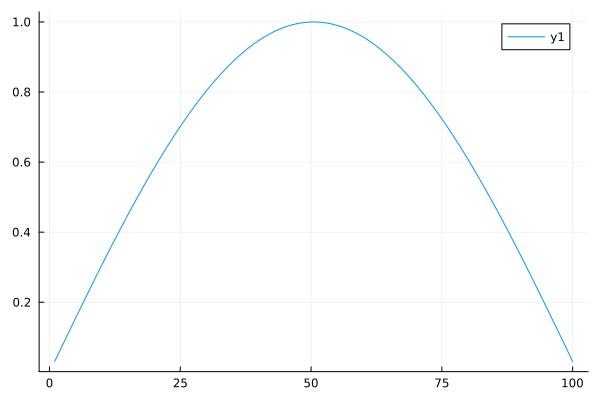

In [54]:
u0(x) = sin(pi*x)
#u0(x) = 1 - abs(x - 1/2)

u0_h_full = u0.((0:(N+1))./ (N+1))
    
u0_h = u0_h_full[2:end-1]
plot(u0_h)

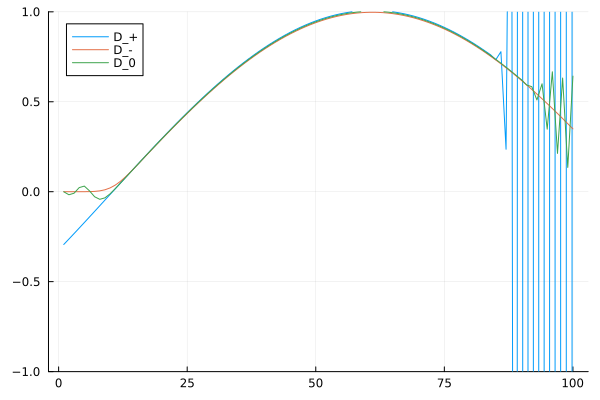

In [55]:
p = plot(ylim=(-1, 1))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

for (nabla, label) = zip(nablas, labels)
    plot!(collect(take(drop(iterate(x -> ee_step(-nabla, x), u0_h), 21), 1)), label="D_$label")
end

display(p)

### 11. Feladat

Ismételjük meg a 10. feladatot az IE módszerrel. Láthatjuk, hogy sajnos az implicit módszerek sem oldanak meg mindent.

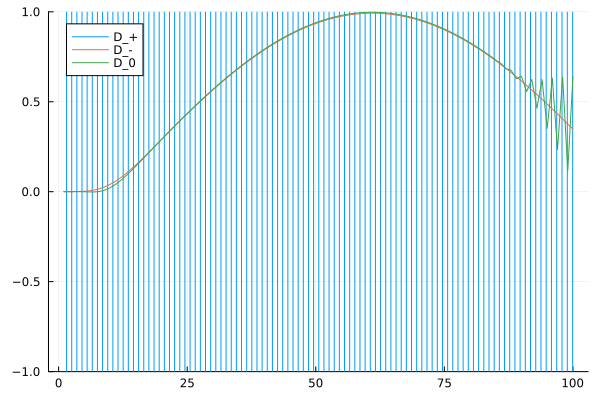

In [56]:
p = plot(ylim=(-1, 1))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

for (nabla, label) = zip(nablas, labels)
    plot!(collect(take(drop(iterate(x -> (I-(dt)*(-nabla))\x, u0_h), 21), 1)), label="D_$label")
end

display(p)

### 12. Feladat
Ismételjük meg a korábbi két feladatot és próbáljunk kisebb lépéshosszal (viszont értelemszerűen többet) lépni.

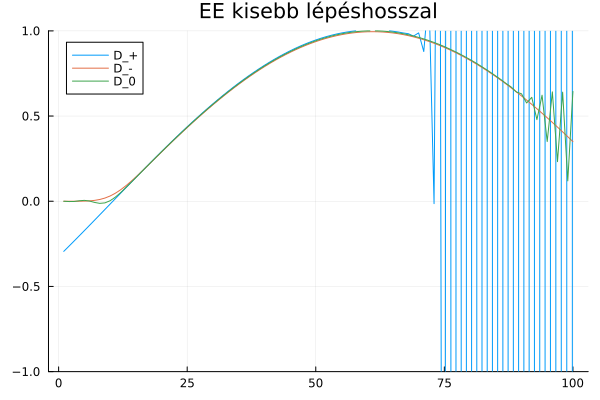

In [57]:
p = plot(ylim=(-1, 1))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

dt = dx / 20
for (nabla, label) = zip(nablas, labels)
    plot!(collect(take(drop(iterate(x -> (I+(dt)*(-nabla))*x, u0_h), 211), 1)), label="D_$label")
end
title!("EE kisebb lépéshosszal")
display(p)

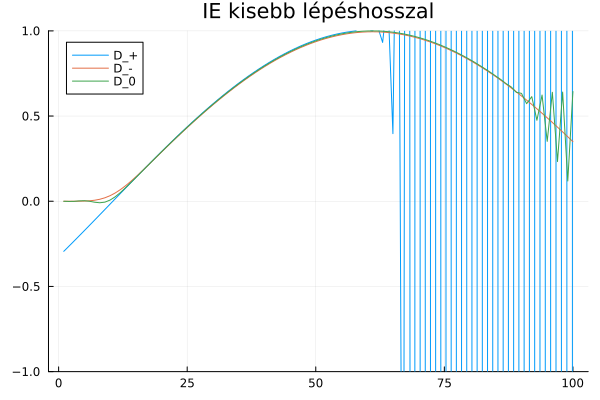

In [58]:
p = plot(ylim=(-1, 1))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

dt = dx / 20
for (nabla, label) = zip(nablas, labels)
    plot!(collect(take(drop(iterate(x -> (I-(dt)*(-nabla))\x, u0_h), 211), 1)), label="D_$label")
end
title!("IE kisebb lépéshosszal")
display(p)

---

Tehát a három térbeli diszkretizáció közül kettő nem igazán jó annak ellenére, hogy ahogy azt a sorfejtés is mutatja, ugyanazt a deriváltat közelítik.

### 13. Feladat

Az előző feladatok folytatásaként tegyünk 51 időlépést a "jó" $\nabla_h$ választással.

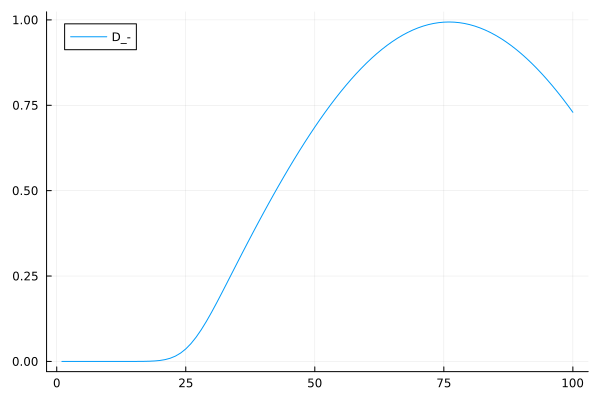

In [59]:
plot(collect(take(drop(iterate(x -> x-(dx/2)*D_minus(N)*x, u0_h), 51), 1)), label="D_-")

### 14. Feladat

Vegyük most a "jó" $\nabla_h$ választást és legyen $dt = 2dx$. Mit tapasztalunk ha (kb.) 5 lépést teszünk?

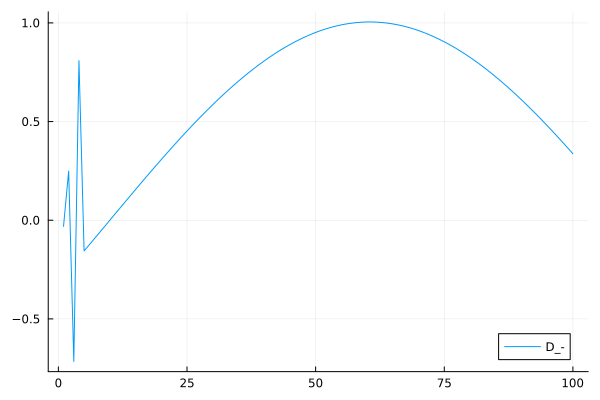

In [60]:
plot(collect(take(drop(iterate(x -> x-(2*dx)*D_minus(N)*x, u0_h), 5), 1)), label="D_-")

---
Tehát egyrészt alkalmas térbei diszkretizációt kell használnunk, másrészt a lépéshosszunk sem lehet (általában) túl nagy.

Hogyan lehetne kvantifikálni amit látunk? Szemlátomást egyfajta oszcillációról van szó. Hogyan mérhetnénk meg ezen oszcilláció mértékét?

Ha $f [a,b] \to \mathbb{C}$ egy függvény, akkor $f$ totális variációját definiálhatjuk a
$$
V_{a,b}(f) = \sup\limits_{ (x_j) \in \mathcal{P}} \sum \| f(x_{i}) - f(x_{i-1}) \|,
$$
módon, ahol $$\mathcal{P} = \left\{(x_j) : a \leq x_i \leq x_{i+1} \leq b\right\},$$
azaz egy egymást követő osztópontokból álló véges sorozatokat tartalmazó halmaz.

Számunkra sokszor egyszerűbb a $2$-es normával dolgozni, ami szintén informatív tud lenni:
$$
\| f\|_2 = \left( \int_a^b |f|^2 \right)^{1/2}.
$$

Az $u$ megoldás esetében ugye a homogén zérus peremfeltétel miatt ezek a mennyiségek monoton csökkenni fognak, ezek tehát a $t \mapsto V_{0,1}(x \mapsto u(t, x))$ és a $t \mapsto \|x \mapsto u(t, x)\|_2$ függvények. Mi szeretnénk olyan numerikus módszert gyártani, mely esetén a numerikus megoldás $u_h$ hasonlóan viselkedik majd. Hogy erre lesz-e idő az jó kérdés, de ehhez a fenti mennyiségek diszkrét megfelelőjét célszerű bevezetni. Az utóbbi megfelelője a $2$-es vektornorma lesz, az előbbié pedig a

$$
V(x) = \sum | x_i -  x_{i-1} |
$$
kifejezés.

### 15. Feladat

Implementáljuk a $V$ függvényt.

In [61]:
V(x) = sum(abs.(x[2:end] - x[1:end-1]))

V (generic function with 1 method)

In [62]:
V((-1).^(1:100))

198

### 16. Feladat
Vegyük a 10. feladat kontextusát, majd ábrázoljuk a numerikus megoldásokat jellemző fenti mennyiségek időbeni alakulását. Tegyünk pl. $201$ lépést.

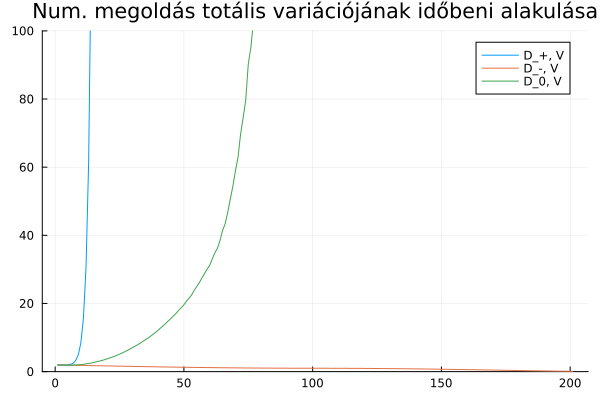

In [63]:
p = plot(ylim=(0,100))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

dt = dx/2

for (nabla, label) = zip(nablas, labels)
    plot!(collect(map(V, take(iterate(x -> ee_step(-nabla, x), u0_h), 201))), label="D_$label, V")
end
title!("Num. megoldás totális variációjának időbeni alakulása")
display(p)

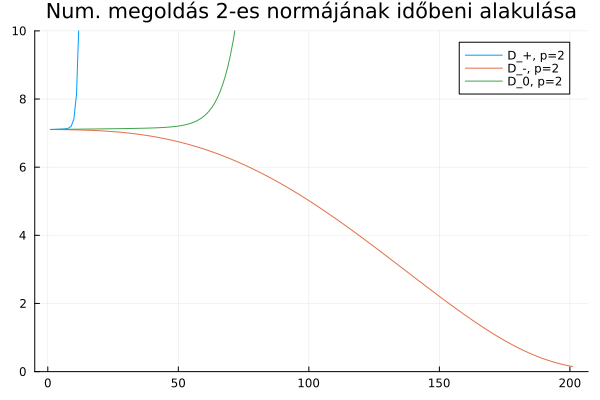

In [64]:
p = plot(ylim=(0,10))

nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

dt = dx/2

for (nabla, label) = zip(nablas, labels)
    plot!(collect(map(x -> norm(x, 2), take(iterate(x -> ee_step(-nabla, x), u0_h), 201))), label="D_$label, p=2")
end

title!("Num. megoldás 2-es normájának időbeni alakulása")
display(p)

---
Vegyünk most periodikus (Dirichlet-)peremfeltételt. Ekkor mind a kettes normának, mind a totális variációnak állandónak kellene maradnia.

$$
\begin{cases}
    \partial_t u &= -\partial_{x} u,  &(0, \infty) \times (0, 1)\text{-en} \\
    \\
    u(0, x)  &= u_0(x), & 0 \leq x \leq 1 \\
    \\
    u(t, 0) &= u(t, 1). &0 < t \\
\end{cases}
$$

### 17. Feladat

Hogyan kell módosítani a térbeli diszkretizációt reprezentáló mátrixainkat?

**Megoldás:**

Az első esetben az utolsó sorban kell az első elemet átírni $N+1$-re.

A második estben az első sor utolsó elemét kell átírni $-(N+1)$-re.

A harmadik esetben az említett helyeken kell a fenti értékek felére átírni a mátrixot.

### 18. Feladat

A 10-es feladat feltételei  mellett oldjuk meg a feladatunkat a három térbeli diszkretizáció mellett az implicit középponti szabállyal (Butcher-tabló: $a_{11} = 1/2, b_1=1$). 

a) Tegyünk 201 lépést és ábrázoljuk a $V$, $\|\cdot\|_2$ mennyiségek időbeni alakulását.

In [65]:
impm_step(x, A, h) = (I-0.5*h*A) \ ((I+ 0.5*h*A)*x)

impm_step (generic function with 1 method)

In [66]:
nablas = [D_plus(N), D_minus(N), D_0(N)]
labels = "+-0"

nablas[1][end, 1] = (N+1)
nablas[2][1, end] = -(N+1)
nablas[3][1, end] = -(N+1)/2
nablas[3][end, 1] = (N+1)/2

50.5

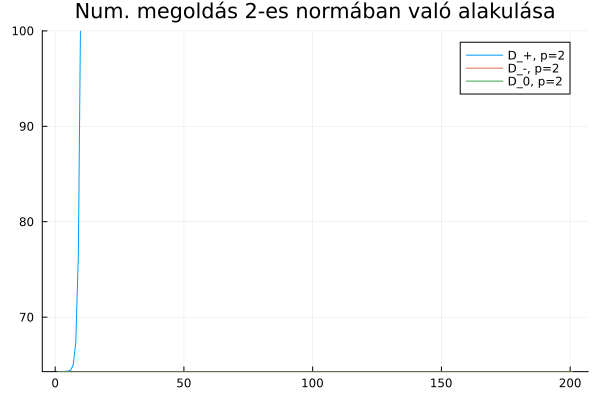

In [67]:
p = plot(ylim=(Inf, 100))

dt = dx/2

for (nabla, label) = zip(nablas, labels)
    plot!(collect(map(x -> norm(x, 1), take(iterate(x -> impm_step(x, -nabla, dt), u0_h), 201))), label="D_$label, p=2")
end

title!("Num. megoldás 2-es normában való alakulása")
display(p)

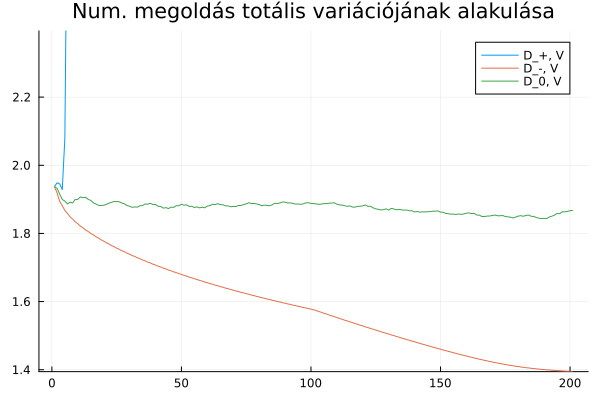

In [68]:
p = plot(ylim=(Inf,1))

dt = dx/2

for (nabla, label) = zip(nablas, labels)
    plot!(collect(map(V, take(iterate(x -> impm_step(x, -nabla, dt), u0_h), 201))), label="D_$label, V")
end

title!("Num. megoldás totális variációjának alakulása")
display(p)

 b) Tegyünk 205 lépést és hasonlítsuk össze a **normált** numerikus megoldásainkat egy ábrán. Normálás alatt sok mindent lehet érteni, például vonjuk ki a vektorból az elemeinek átlagát, majd osszunk le a vektor elemeinek szórásával, de leoszthatunke egyszerűen csak a legnagyobb abszolútértékű elemének abszolútértékével is.

In [69]:
mu(x) = sum(x) / length(x)
var(x) = sum((x .- mu(x)).^2)
sigma(x) = var(x).^0.5

function normit(x)
    return (x .- mu(x)) ./ sigma(x)
end

normit (generic function with 1 method)

In [70]:
normit([-1, 0, 1])

3-element Vector{Float64}:
 -0.7071067811865475
  0.0
  0.7071067811865475

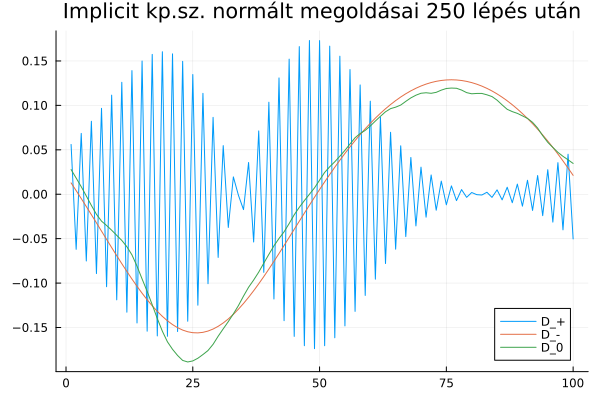

In [71]:
p = plot()

dt = dx/2

for (nabla, label) = zip(nablas, labels)
    plot!(normit(collect(take(drop(iterate(x -> impm_step(x, -nabla, dt), u0_h), 251), 1))[1]), label="D_$label")
end

title!("Implicit kp.sz. normált megoldásai 250 lépés után")
display(p)